In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
csv_path = [
   "../../Raw_CSV/April 25-26 - 2022/Upwork/Upwork_Creative_Director.csv",
   "../../Raw_CSV/April 27 - 2022/Upwork/Upwork-Creative-Director.csv",
    "../../Raw_CSV/April 28 - 2022/Upwork/Freelance Creative Director Jobs - Upwork.csv", 
]
merge = pd.concat(map(pd.read_csv,csv_path),ignore_index=True)
merge["Skill"]= merge["Skill"].str.replace("^\['|'\]$","")
merge

/var/folders/tc/qdg72rpx523gjsqcr2vf_0c00000gn/T/ipykernel_2570/2025610879.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  merge["Skill"]= merge["Skill"].str.replace("^\['|'\]$","")


,Title,Description,Location,Skill,Est.Proj-Budget,Job Type,Contractor Tier,Duration,Title_URL,Job_type,Contractor_tier,Skill_one,Skill_two,skill_three,skill_four,Skill_Five,Skill_Six,upskillbadge18,Skill_Eight,Skill_Nine
0,Help us cultivate User Generate Content (Selfi...,Help me get people to take notice to our selfi...,None,"Graphic Design', 'Facebook', 'Social Media Mar...",\n $35\n,Fixed-price,Expert,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Content Written Skills,"Responsible for generating stand-alone copies,...",None,"Creative Writing', 'Content Writing', 'Blog Co...",None,Hourly: $17.00-$39.00,Entry level,"1 to 3 months, Less than 30 hrs/week",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Full Stack Developer needed to redesign and mi...,We are looking for a part-time Full-Stack Deve...,None,"WordPress', 'Web Design', 'Web Development', '...",None,Hourly: $10.00-$40.00,Entry level,"3 to 6 months, Less than 30 hrs/week",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Artist to bring my tattoo vision to life,I would like someone to design a tattoo for me...,None,"Creative Direction', 'Graphic Design', 'Illust...",None,Hourly: $14.00-$28.00,Intermediate,"Less than 1 month, Less than 30 hrs/week",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Design a resume in word or power point,There is a word version of a resume for a high...,None,"Sales Presentation', 'Education Presentation',...",\n $90\n,Fixed-price,Expert,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,Graphic Designer Wanted (Philippines Area),"Do you thrive in a collaborative, friendly, fu...",NaN,NaN,NaN,NaN,NaN,"3 to 6 months, Less than 30 hrs/week",https://www.upwork.com/job/Graphic-Designer-Wa...,Hourly: $8.00-$10.00,Intermediate,Website Asset,Social Media Imagery,Web Design,Brand Identity Design,Advertising Design,Graphic Design,NaN,creative,creative
346,Contract Graphic Designer,Join Fairyland as a Contract Graphic Designer ...,NaN,NaN,NaN,NaN,NaN,"More than 6 months, Less than 30 hrs/week",https://www.upwork.com/job/Contract-Graphic-De...,Hourly: $40.00,Intermediate,Adobe Illustrator,Adobe InDesign,Graphic Design,Layout Design,Print Design,Brand Identity & Guidelines,Corporate Brand Identity,Director,Director
347,Amazon Graphic Designer,What will you do:\nBe part of the company glob...,NaN,NaN,NaN,NaN,NaN,"More than 6 months, 30+ hrs/week",https://www.upwork.com/job/Amazon-Graphic-Desi...,Hourly: $10.00-$20.00,Intermediate,Clothing,Adobe Photoshop,Graphic Design,Adobe Illustrator,Social Media Imagery,Banner Ad Design,Adobe InDesign,creatively,creatively
348,Graphic Designer,We are looking for a graphic designer for soci...,NaN,NaN,NaN,NaN,NaN,"3 to 6 months, Less than 30 hrs/week",https://www.upwork.com/job/Graphic-Designer_~0...,Hourly: $15.00-$34.00,Intermediate,Landing Page,Adobe Photoshop,Graphic Design,Adobe Illustrator,Adobe InDesign,Social Media Imagery,Brand Identity & Guidelines,creative,creative


In [3]:
merge["Est.Proj-Budget"] = merge["Est.Proj-Budget"].str.strip()

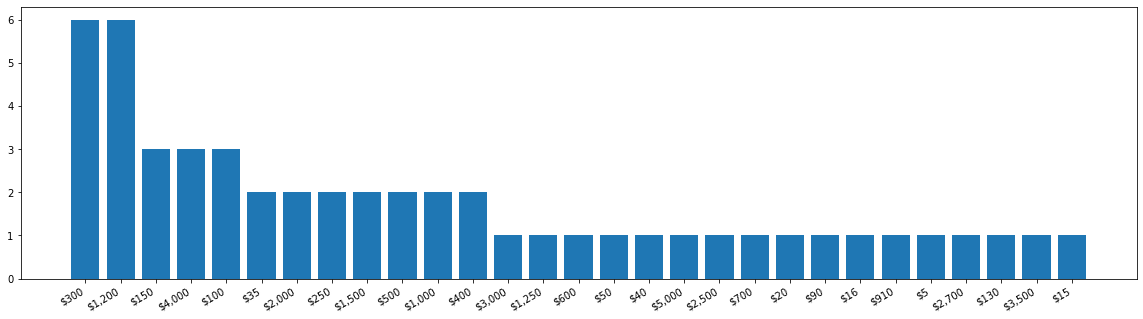

In [4]:
filt = (merge["Est.Proj-Budget"] != "None") & (merge["Est.Proj-Budget"].notna())
filter_est = merge.loc[filt]
count_est = filter_est["Est.Proj-Budget"].value_counts()
plt.figure(figsize=(20, 5))
plt.bar(count_est.index, count_est.values)
plt.xticks(rotation=30, ha="right")
plt.show()



In [5]:
filt_first_tier = merge["Contractor_tier"].fillna("")
# frame_first_tier =  merge.loc[filt_first_tier,"Contractor_tier"]
filt_second_tier = merge["Contractor Tier"].fillna("")
# frame_second_tier = merge.loc[filt_second_tier,"Contractor Tier"]

merge["CT"] = filt_first_tier + filt_second_tier


In [6]:
merge["CT"] = merge["CT"].str.strip()

In [7]:
count_tier = merge["CT"].value_counts()
count_tier

Intermediate    164
Expert          153
Entry level      33
Name: CT, dtype: int64

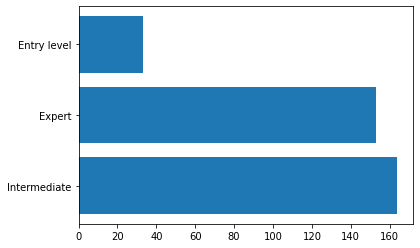

In [8]:
plt.barh(count_tier.index,count_tier.values)
plt.show()

In [9]:
merge["Combine Skills"] =   merge.Skill.fillna("") + " " + merge.Skill_one.fillna("") + "," + merge.Skill_two.fillna(",") + ", " + merge.skill_four.fillna(",") + ", " + merge.skill_three.fillna(",")

In [10]:
merge["Combine Skills"] = merge["Combine Skills"].str.replace("'", "")

In [11]:
merge["Combine Skills"] = merge["Combine Skills"].str.split(",")

In [12]:
skill_append = []
for i in range(len(merge["Combine Skills"])):
    count = merge["Combine Skills"][i]
    for j in range(len(count)):
        skill_append.append(count[j])

In [13]:
skill_without_space = []
filter_skill = list(filter(None, skill_append))
for i in filter_skill:
    if i != " ":
        skill_without_space.append(i)

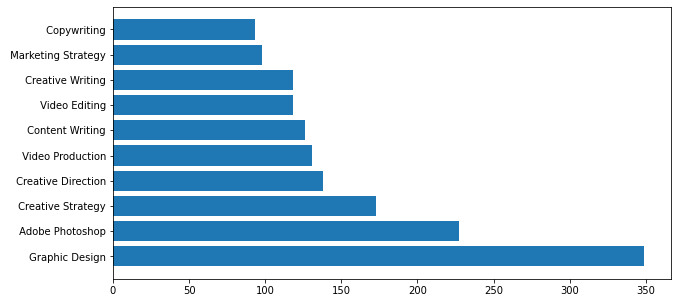

In [14]:
skill_frame = pd.DataFrame(skill_without_space, columns={"Skill"})
count_skill = skill_frame["Skill"].value_counts()[0:10]
plt.figure(figsize=(10,5))
plt.barh(count_skill.index,count_skill.values)
plt.show()

In [15]:
merge["JT"] = merge["Job Type"].fillna("") + merge["Job_type"].fillna("")

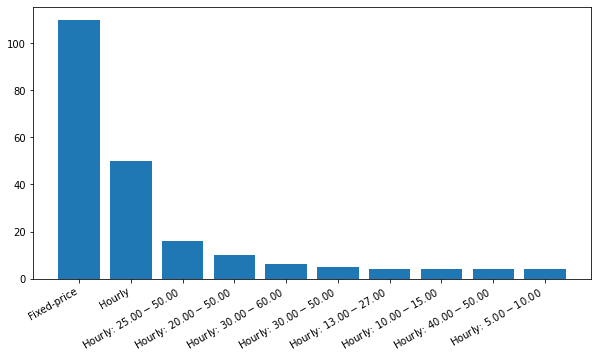

In [16]:
count_jt = merge["JT"].value_counts()[0:10]
plt.figure(figsize=(10,5))
plt.bar(count_jt.index, count_jt.values)
plt.xticks(rotation="30",ha="right")
plt.show()


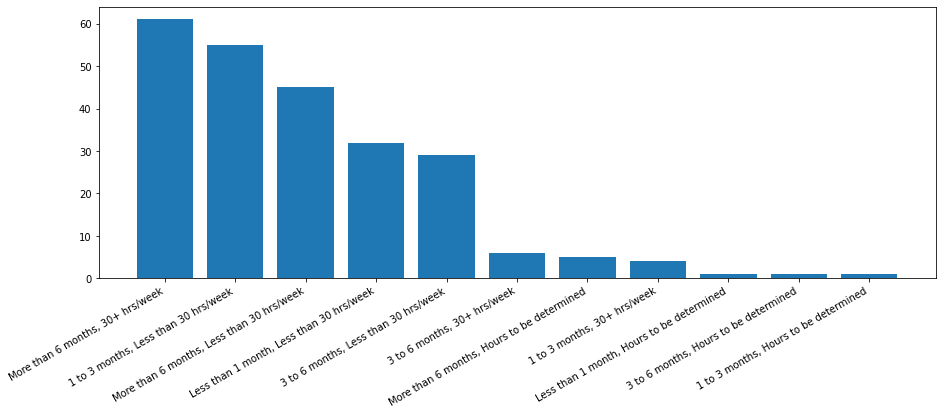

In [17]:
filt_loc = (merge["Duration"] != "None")
merge_duration = merge.loc[filt_loc,"Duration"]
count_duration = merge_duration.value_counts()
plt.figure(figsize=(15,5))
plt.bar(count_duration.index, count_duration.values)
plt.xticks(rotation="30",ha="right")
plt.show()

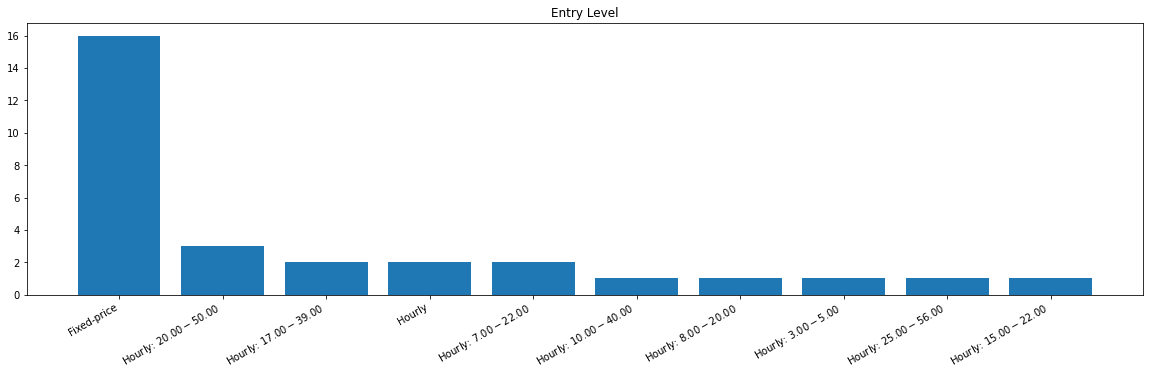

In [18]:
filt = (merge["CT"] == "Entry level")
count_entry_level = merge.loc[filt,"JT"].value_counts()[0:10]

plt.figure(figsize=(20,5))
plt.bar(count_entry_level.index, count_entry_level.values)
plt.title("Entry Level")
plt.xticks(rotation="30", ha="right")
plt.show()


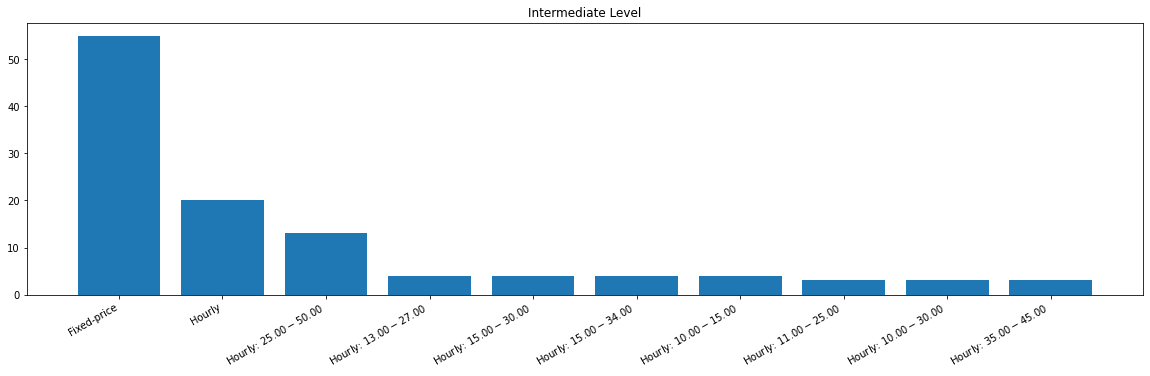

In [19]:
filt = (merge["CT"] == "Intermediate")
count_entry_level = merge.loc[filt,"JT"].value_counts()[0:10]

plt.figure(figsize=(20,5))
plt.bar(count_entry_level.index, count_entry_level.values)
plt.title("Intermediate Level")
plt.xticks(rotation="30", ha="right")
plt.show()

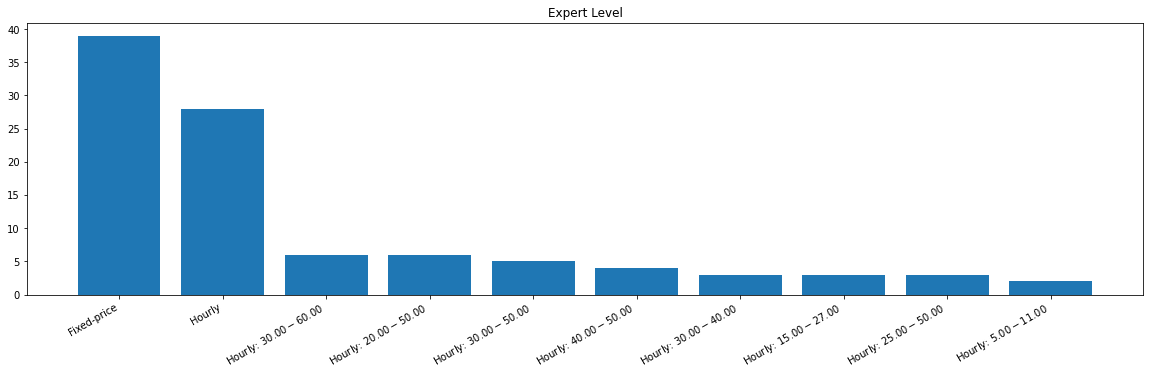

In [20]:
filt = (merge["CT"] == "Expert")
count_entry_level = merge.loc[filt,"JT"].value_counts()[0:10]

plt.figure(figsize=(20,5))
plt.bar(count_entry_level.index, count_entry_level.values)
plt.title("Expert Level")
plt.xticks(rotation="30", ha="right")
plt.show()